In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r"C:\sachin\Python\Daily Project\customer_churn\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
# Drop the customerid collumn
data = data.drop('customerID', axis=1)

In [10]:
# check the inconsistent data 
for column in data.columns:
    print(f"{column}: {data[column].unique()}")
    

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalChar

### Target Variable Analysis (Churn)

C:\Users\Sachin Hembram\AppData\Local\Temp\ipykernel_16852\2395412360.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=data, palette='Set2')


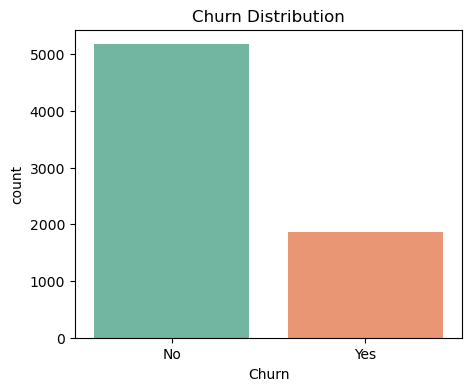

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


In [11]:
plt.figure(figsize=(5,4))
sns.countplot(x='Churn', data=data, palette='Set2')
plt.title("Churn Distribution")
plt.show()

churn_rate = data['Churn'].value_counts(normalize=True) * 100
print(churn_rate)


### Categorical Feature Analysis
How does churn vary by gender, senior citizen, partner, dependents, etc.?

Which contract types have the most churn?

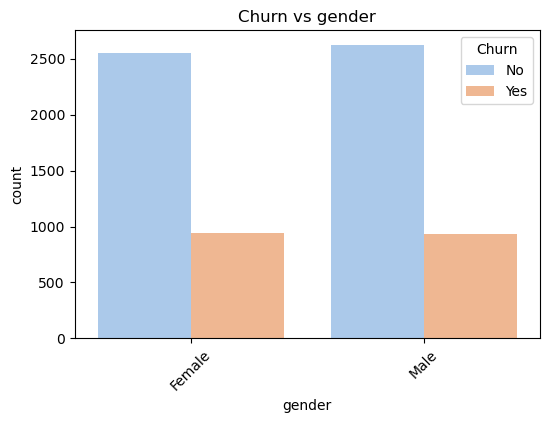

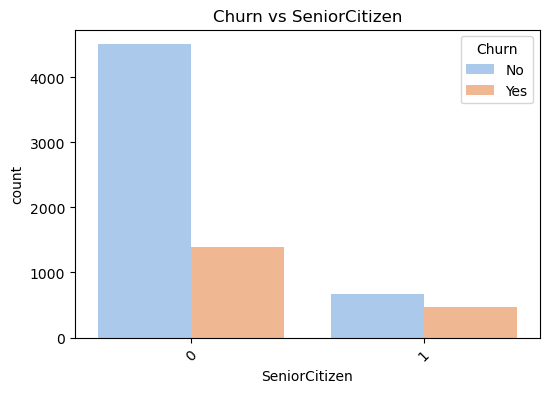

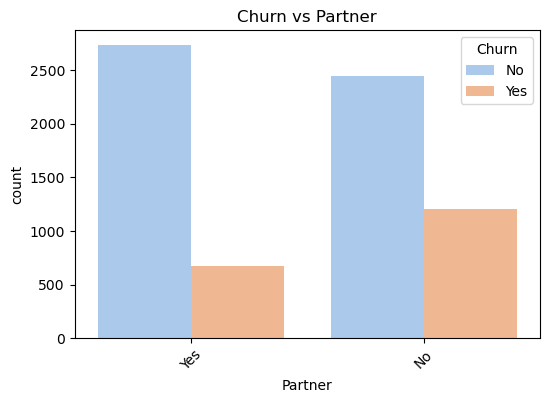

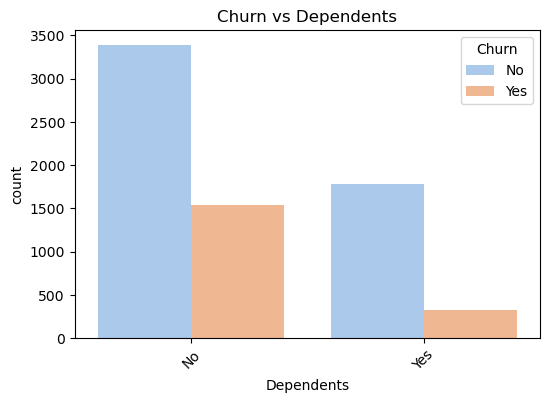

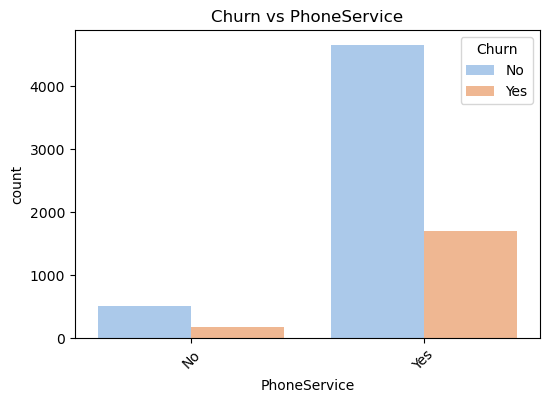

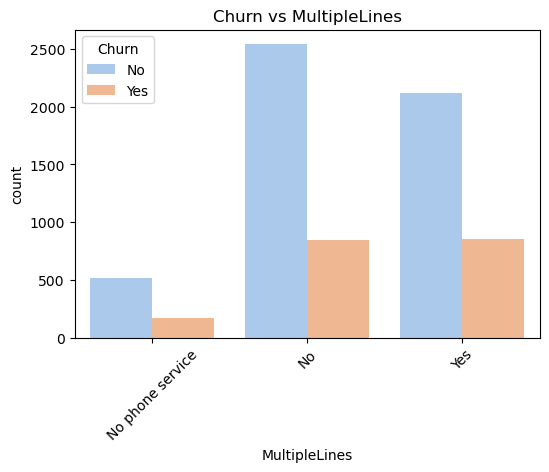

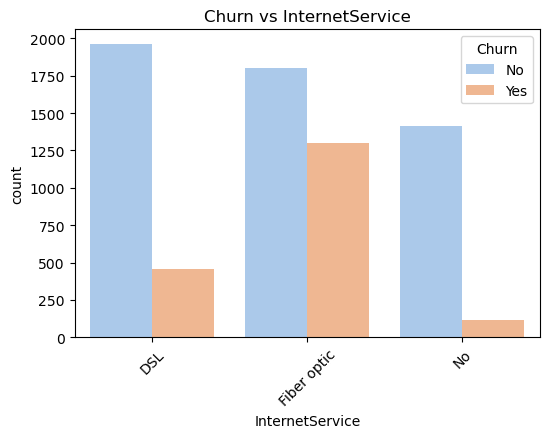

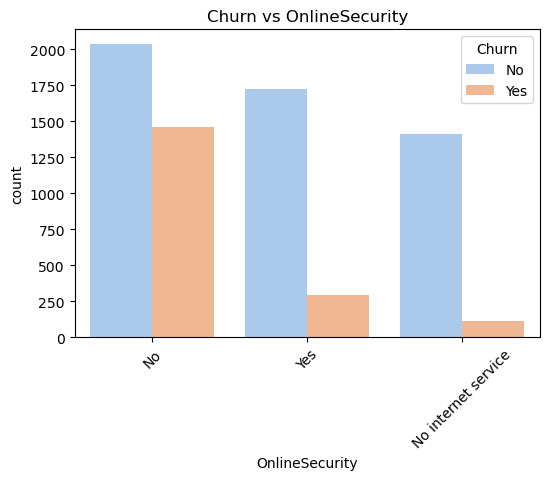

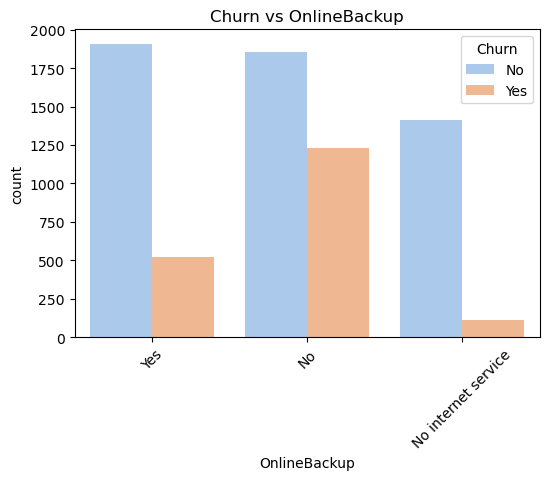

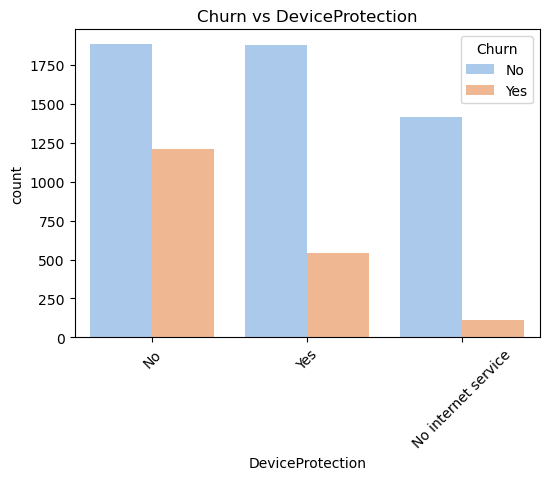

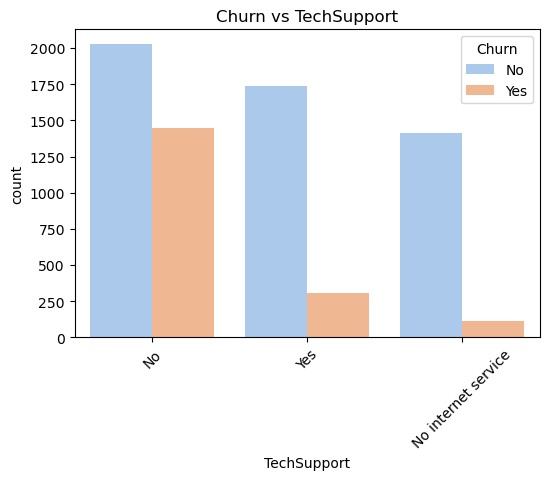

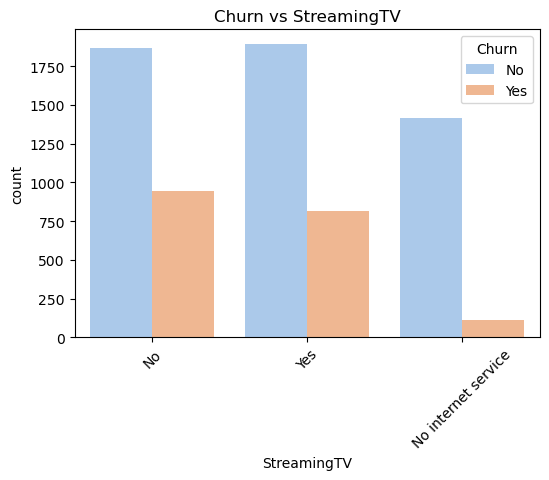

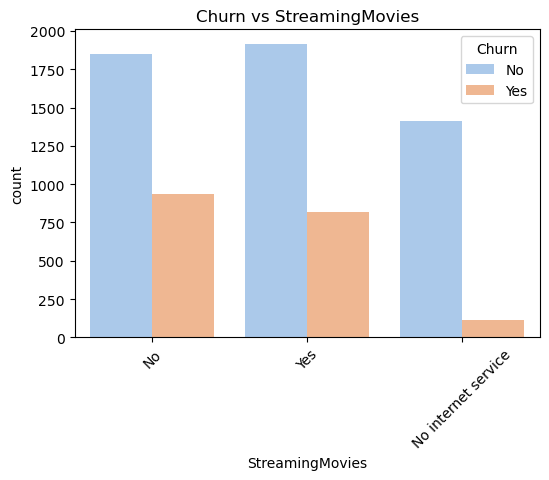

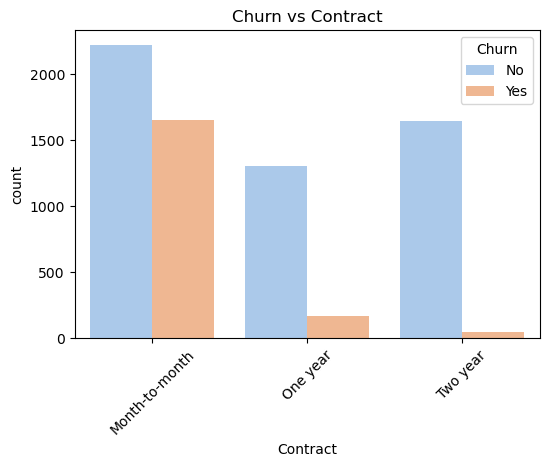

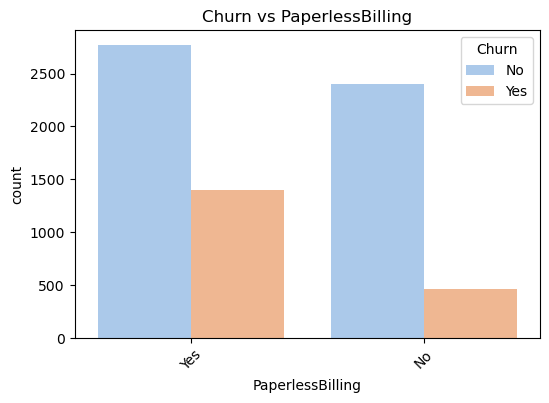

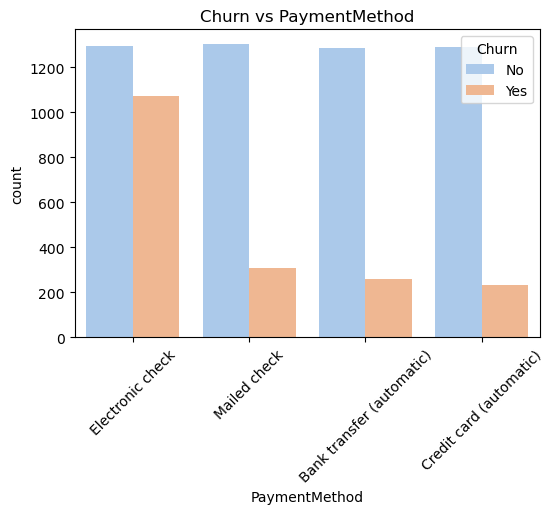

In [12]:
categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 
                    'PhoneService', 'MultipleLines', 'InternetService',
                    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                    'TechSupport', 'StreamingTV', 'StreamingMovies', 
                    'Contract', 'PaperlessBilling', 'PaymentMethod']

for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue='Churn', data=data, palette='pastel')
    plt.title(f"Churn vs {col}")
    plt.xticks(rotation=45)
    plt.show()


### Tenure vs Churn Insights
Do long-term customers churn less?

What’s the churn rate by tenure bucket?

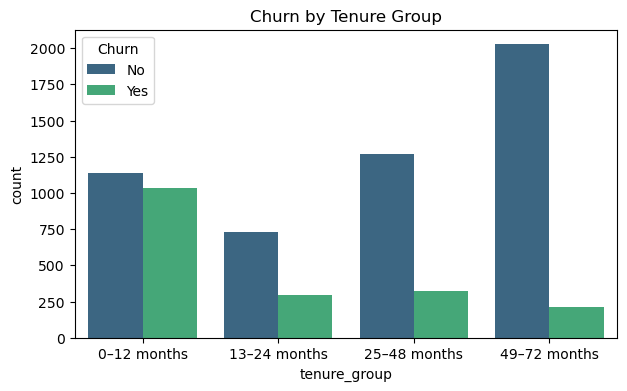

In [13]:
data['tenure_group'] = pd.cut(data['tenure'], bins=[0, 12, 24, 48, 72], 
                              labels=['0–12 months', '13–24 months', '25–48 months', '49–72 months'])
plt.figure(figsize=(7,4))
sns.countplot(x='tenure_group', hue='Churn', data=data, palette='viridis')
plt.title("Churn by Tenure Group")
plt.show()


### Internet Service and Churn
Which internet service type has the highest churn?

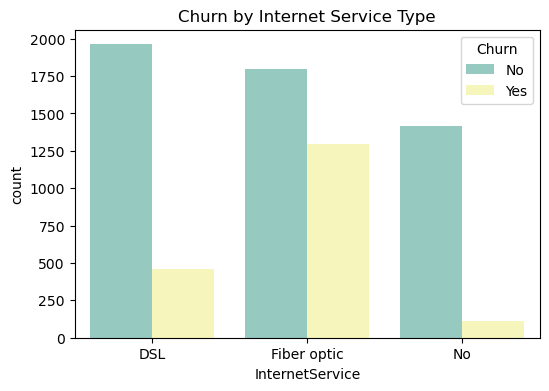

In [14]:
plt.figure(figsize=(6,4))
sns.countplot(x='InternetService', hue='Churn', data=data, palette='Set3')
plt.title("Churn by Internet Service Type")
plt.show()


### Contract Type vs Churn
Which contract duration reduces churn?

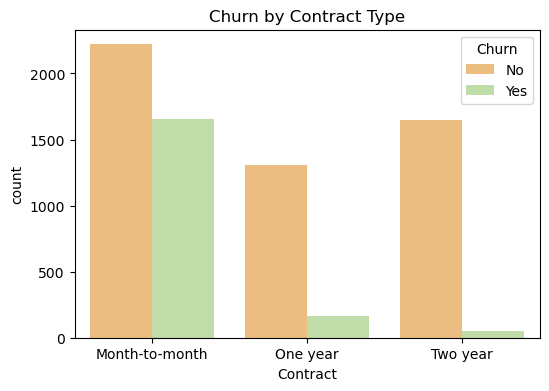

In [15]:
plt.figure(figsize=(6,4))
sns.countplot(x='Contract', hue='Churn', data=data, palette='Spectral')
plt.title("Churn by Contract Type")
plt.show()


### Payment Method vs Churn
Do customers with electronic check payments churn more?

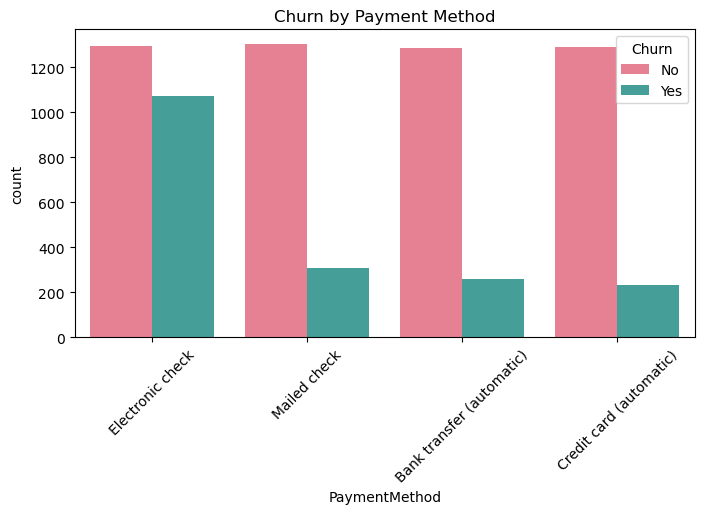

In [16]:
plt.figure(figsize=(8,4))
sns.countplot(x='PaymentMethod', hue='Churn', data=data, palette='husl')
plt.title("Churn by Payment Method")
plt.xticks(rotation=45)
plt.show()


### Boxplots — Charges vs Churn
Are churned customers paying more on average?

C:\Users\Sachin Hembram\AppData\Local\Temp\ipykernel_16852\4125051992.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='MonthlyCharges', data=data, palette='coolwarm')


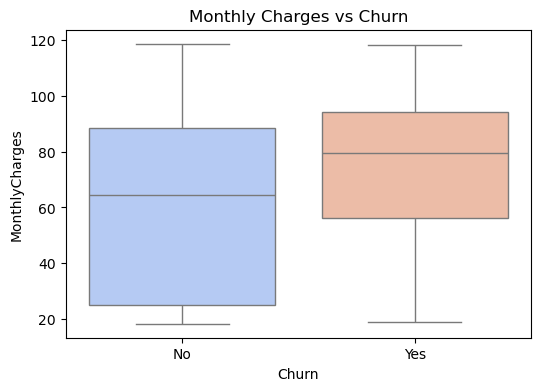

C:\Users\Sachin Hembram\AppData\Local\Temp\ipykernel_16852\4125051992.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='TotalCharges', data=data, palette='coolwarm')


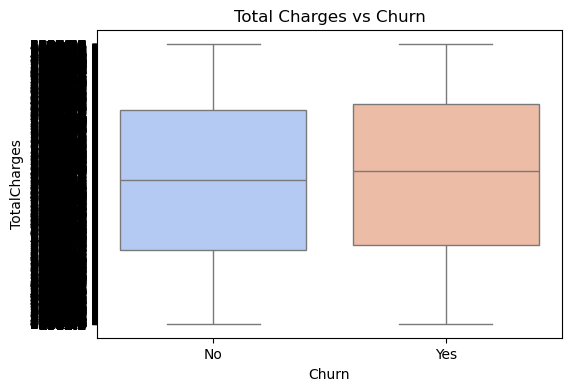

In [17]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Churn', y='MonthlyCharges', data=data, palette='coolwarm')
plt.title("Monthly Charges vs Churn")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x='Churn', y='TotalCharges', data=data, palette='coolwarm')
plt.title("Total Charges vs Churn")
plt.show()


🧾 Summary of Customer Churn Data Analysis

This analysis explores the Telco Customer Churn dataset to understand which factors influence customer churn (i.e., customers leaving the service). The analysis covers both categorical and numerical insights using Python’s data analysis and visualization libraries such as Pandas, Seaborn, and Matplotlib.

1. Data Loading and Cleaning

The dataset is read using pandas.read_csv().

The customerID column is dropped since it’s a unique identifier with no analytical value.

The script prints each column’s unique values to check for inconsistent or unexpected entries.

2. Target Variable Analysis (Churn)

Visualized the distribution of churn using a count plot.

Calculated the churn rate (%), showing the percentage of customers who left vs. stayed.

This helps understand class imbalance (important for future model building).

3. Categorical Feature Analysis

Explored how churn varies across multiple categorical features, including:

Demographics: Gender, Senior Citizen, Partner, Dependents

Services: InternetService, OnlineSecurity, OnlineBackup, TechSupport, etc.

Contracts & Billing: Contract type, PaperlessBilling, PaymentMethod

Used count plots with the churn status as the hue to visualize trends.

Identified patterns such as higher churn among:

Month-to-month contract users

Customers using Electronic Check payments

Customers with no online security or tech support

4. Tenure vs Churn Insights

Grouped customers into tenure buckets:

0–12 months, 13–24 months, 25–48 months, and 49–72 months

Observed that churn decreases as tenure increases, indicating that long-term customers are more loyal.

5. Internet Service and Churn

Compared churn across different internet services (DSL, Fiber optic, No internet).

Found that Fiber optic users tend to churn more frequently than DSL users, possibly due to higher charges or competition.

6. Contract Type and Churn

Analyzed the relationship between contract duration and churn.

Found that Month-to-Month contracts have the highest churn rate, whereas One-year and Two-year contracts retain more customers.

7. Payment Method and Churn

Visualized churn based on the payment method.

Customers using Electronic Check payments showed a significantly higher churn rate, possibly due to dissatisfaction or ease of cancellation.

8. Charges vs Churn (Boxplots)

Used boxplots to compare:

Monthly Charges vs Churn

Total Charges vs Churn

Found that churned customers generally have higher monthly charges.

This indicates that pricing could be a major factor in customer retention.